# Gibbs sampler

* The Gibbs sampler lets us sample for a multivariate distribution
* by repeately sampling from a conditional univariate distribution

## Example

* Assume that $\theta$ is a random variable following a bivariate Gaussian distribution

$$
\theta \sim N(0,\Sigma)
$$

where the covariance matrix $\Sigma$ is defined by

$$
\Sigma = \begin{bmatrix} 1 & \rho \\ \rho & 1\end{bmatrix}
$$

Conditional probabilities

$$
p(\theta_1 | \theta_2) = \frac{ p(\theta_1, \theta_2) } { p(\theta_2) }
$$

where the marginal distribution $ p(\theta_2) = \int_{\mathbb{R}} p(\theta_1, \theta_2) d\theta_1 $
$$
\theta_1 | \theta_2 \sim N(\rho \theta_2, 1-\rho^2) \\
\theta_2 | \theta_1 \sim N(\rho \theta_1, 1-\rho^2) 
$$

Starting with an initial value $\theta_1^{(0)}$ and $\theta_2^{(0)}$

$$
\theta_1^{(k)} \;\mbox{is a realization of}\;\;  N(\rho \theta_2^{(k-1)}, 1-\rho^2) \\
\theta_2^{(k)} \;\mbox{is a realization of}\;\;  N(\rho \theta_1^{(k)}, 1-\rho^2) 
$$


In more than 2 dimensions,  $\theta_j^{(k)}$ is a realization of

$$
p\left(\theta_j^{(k)}|\theta_1^{(k)},\dots,\theta_{j-1}^{(k)},\theta_{j+1}^{(k-1)},\dots,\theta_n^{(k-1)}\right)
$$

In [1]:
using PyPlot

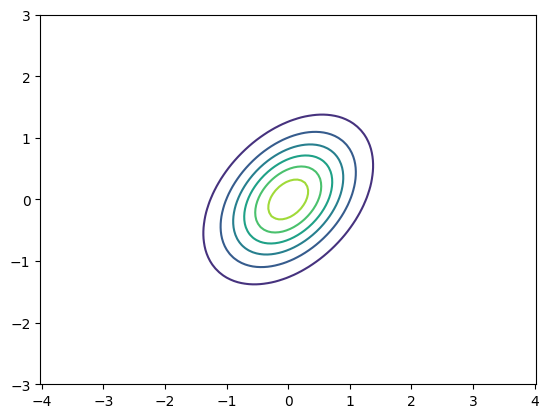

In [2]:
ρ = 0.4

Σ = [1 ρ;
     ρ 1]

x = range(-3,stop=3,length=100)
y = range(-3,stop=3,length=100)
p = zeros(length(x),length(y))

for j = 1:length(y)
   for i = 1:length(x)
        p[i,j] = exp(- [x[i], y[j]]' * inv(Σ) * [x[i], y[j]] ) 
    end
end
contour(x,y,copy(p'))
axis("equal");

In [3]:
niter = 10;

θ = randn(2,niter)

for k = 2:niter
  θ[1,k] = ρ * θ[2,k-1] + randn() * (1-ρ^2)
  θ[2,k] = ρ * θ[1,k] + randn() * (1-ρ^2)
end

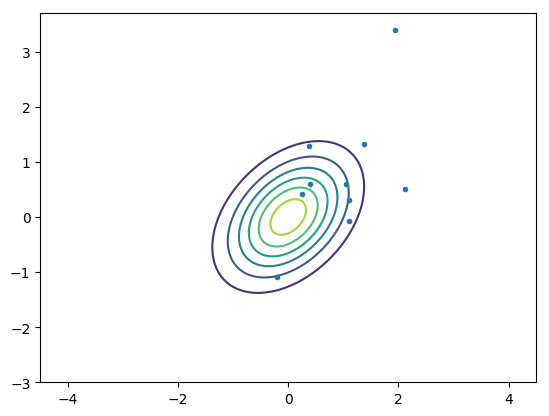

In [4]:
contour(x,y,copy(p'))
plot(θ[1,:],θ[2,:],".")
axis("equal");

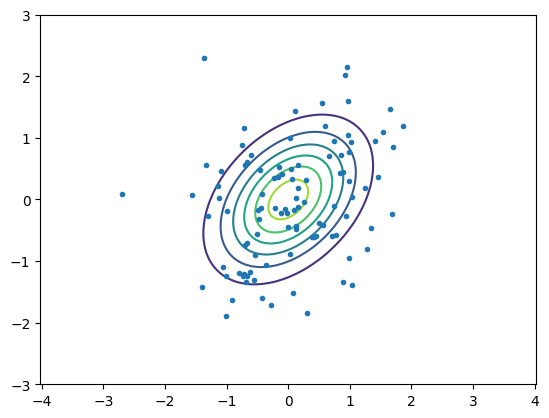

In [5]:
niter = 10;

function sampler(niter,ρ)

θ = randn(2)

for k = 2:niter
  θ[1] = ρ * θ[2] + randn() * (1-ρ^2)
  θ[2] = ρ * θ[1] + randn() * (1-ρ^2)
end
    return θ
end

function nsampler(Nsam,iter,ρ)
   θ = zeros(2,Nsam)
   for l = 1:Nsam
      θ[:,l] = sampler(niter,ρ)
   end
   return θ
end

Nsam = 100
θ = nsampler(Nsam,niter,ρ)
contour(x,y,copy(p'))
plot(θ[1,:],θ[2,:],".")
axis("equal");

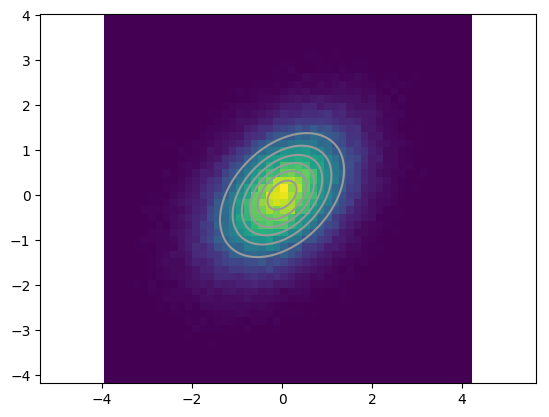

In [6]:
Nsam = 100000
θ = nsampler(Nsam,niter,ρ)
contour(x,y,copy(p'); colors=[[.6,.6,.6]])
PyPlot.plt[:hist2d](θ[1,:],θ[2,:],50)
axis("equal");
